In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for data manipulation, numerical operations, and plotting.

# India GDP Data Analysis

This notebook analyzes India's GDP data from 1961 to 2021.

## 1. Data Loading

In [2]:
# Load the data from the CSV file into a pandas DataFrame.
df = pd.read_csv("/content/India_GDP_Data.csv")
# Display the DataFrame to see the loaded data.
df

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
1,2020,2667.69,1933,-6.60
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
4,2017,2651.47,1981,6.80
...,...,...,...,...
56,1965,59.55,119,-2.64
57,1964,56.48,116,7.45
58,1963,48.42,101,5.99
59,1962,42.16,90,2.93


In [3]:
# Display information about the DataFrame, including column data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                61 non-null     int64  
 1   GDP_In_Billion_USD  61 non-null     float64
 2   Per_Capita_in_USD   61 non-null     int64  
 3   Percentage_Growth   61 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [4]:
# Display descriptive statistics of the DataFrame columns, providing insights into the data distribution.
df.describe()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
count,61.000000,61.000000,61.000000,61.000000
mean,1991.000000,709.889016,611.163934,5.089344
std,17.752934,870.169692,618.757227,3.282711
min,1961.000000,39.230000,85.000000,-6.600000
25%,1976.000000,102.720000,163.000000,3.740000
50%,1991.000000,296.040000,346.000000,5.710000
75%,2006.000000,940.260000,807.000000,7.550000
max,2021.000000,3173.400000,2277.000000,9.630000


In [5]:
cols = ["Year", "GDP_In_Billion_USD", "Per_Capita_in_USD", "Percentage_Growth "]

In [6]:
df[cols].skew()

,0
Year,0.000000
GDP_In_Billion_USD,1.451410
Per_Capita_in_USD,1.339345
Percentage_Growth,-1.514388


In [7]:
df[cols].kurt()

,0
Year,-1.200000
GDP_In_Billion_USD,0.853113
Per_Capita_in_USD,0.494531
Percentage_Growth,2.912941


In [8]:
df.isnull().sum()

,0
Year,0
GDP_In_Billion_USD,0
Per_Capita_in_USD,0
Percentage_Growth,0


## 2. Outlier Handling

In [9]:
import numpy as np

# Copy the DataFrame to preserve original
df_iqr_filled = df.copy()

# Columns to process
selected_cols = ["GDP_In_Billion_USD", "Per_Capita_in_USD", "Percentage_Growth "]

# Loop through each column
for col in selected_cols:
    # Calculate the first quartile (Q1).
    Q1 = df[col].quantile(0.25)
    # Calculate the third quartile (Q3).
    Q3 = df[col].quantile(0.75)
    # Calculate the Interquartile Range (IQR).
    IQR = Q3 - Q1
    # Calculate the lower bound for outlier detection.
    lower = Q1 - 1.5 * IQR
    # Calculate the upper bound for outlier detection.
    upper = Q3 + 1.5 * IQR

    # Replace low outliers with lower bound, high outliers with upper bound
    # Values below the lower bound are replaced with the lower bound.
    # Values above the upper bound are replaced with the upper bound.
    # Values within the bounds remain unchanged.
    df_iqr_filled[col] = np.where(
        df[col] < lower, lower,
        np.where(df[col] > upper, upper, df[col])
    )

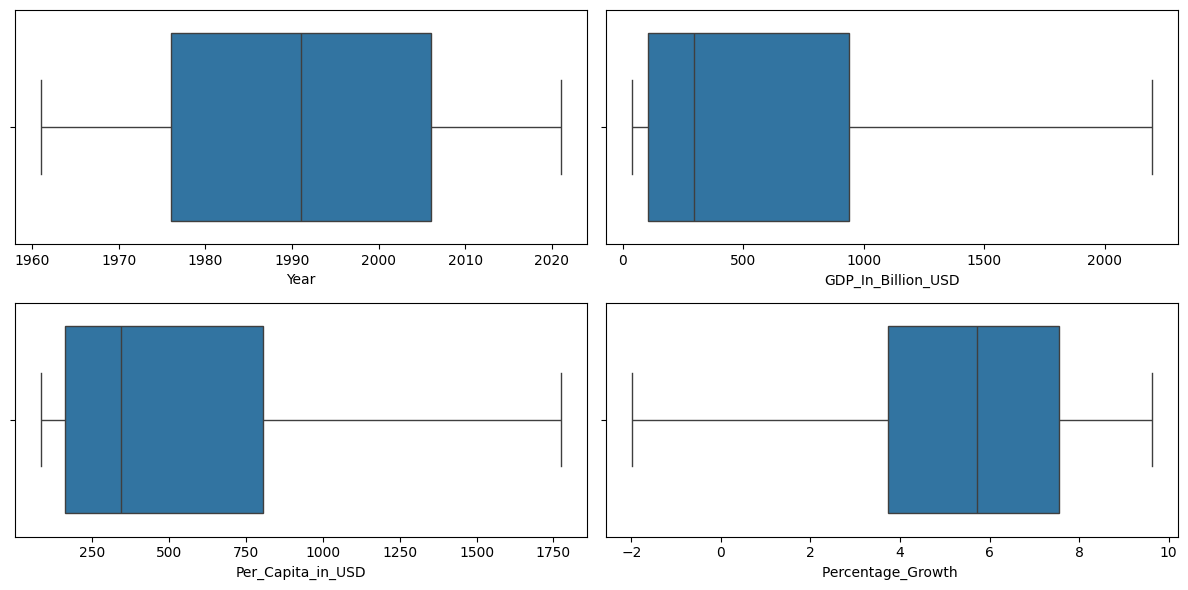

In [10]:
# Create a figure and a 2x2 grid of subplots for displaying box plots.
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Create a box plot for 'Year' on the first subplot (top-left).
ax1 = axs[0,0]
sns.boxplot(data=df_iqr_filled, x="Year", ax = ax1)

# Create a box plot for 'GDP_In_Billion_USD' on the second subplot (top-right).
ax1 = axs[0,1] # This should be ax2 based on the subplots definition
sns.boxplot(data=df_iqr_filled, x="GDP_In_Billion_USD", ax = ax1)

# Create a box plot for 'Per_Capita_in_USD' on the third subplot (bottom-left).
ax1 = axs[1,0] # This should be ax3 based on the subplots definition
sns.boxplot(data=df_iqr_filled, x="Per_Capita_in_USD", ax = ax1)

# Create a box plot for 'Percentage_Growth ' on the fourth subplot (bottom-right).
ax1 = axs[1,1] # This should be ax4 based on the subplots definition
sns.boxplot(data=df_iqr_filled, x="Percentage_Growth ", ax = ax1)

# Display the plots.
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

## 3. Data Visualization

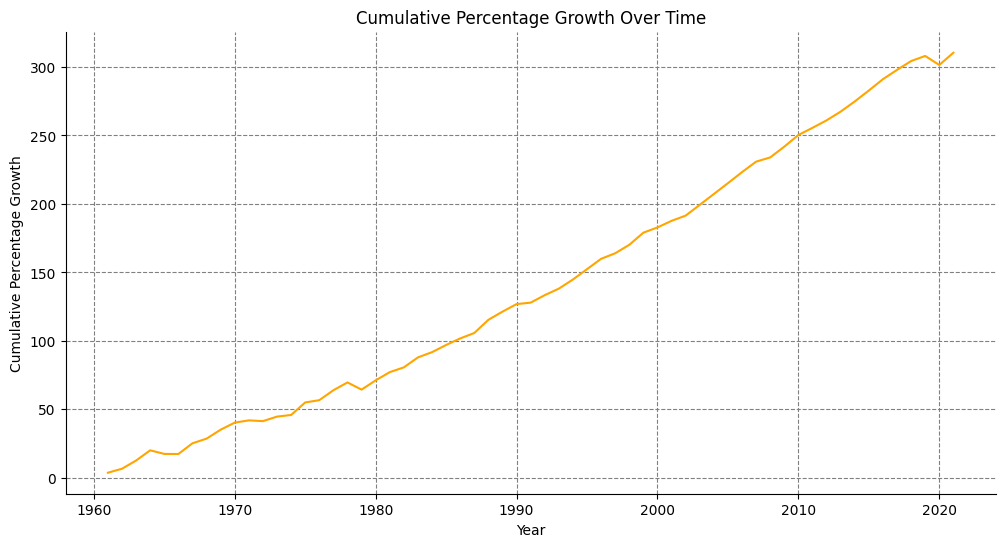

In [11]:

# Set the figure size for the plot.
plt.figure(figsize=(12,6))

# Sort the DataFrame by 'Year' in ascending order and update in place.
df.sort_values(by="Year", ascending=True, inplace=True)
# Plot the cumulative sum of 'Percentage_Growth' over the years.
plt.plot(df["Year"], np.cumsum(df["Percentage_Growth "]), color="orange")
# Set the label for the x-axis.
plt.xlabel("Year")
# Set the label for the y-axis.
plt.ylabel("Cumulative Percentage Growth")
# Set the title of the plot.
plt.title("Cumulative Percentage Growth Over Time")
# Add a grid to the plot for better readability.
plt.grid(linestyle="--", color="grey")
# Remove the spines (borders) from the plot.
sns.despine()
# Display the plot.
plt.show()

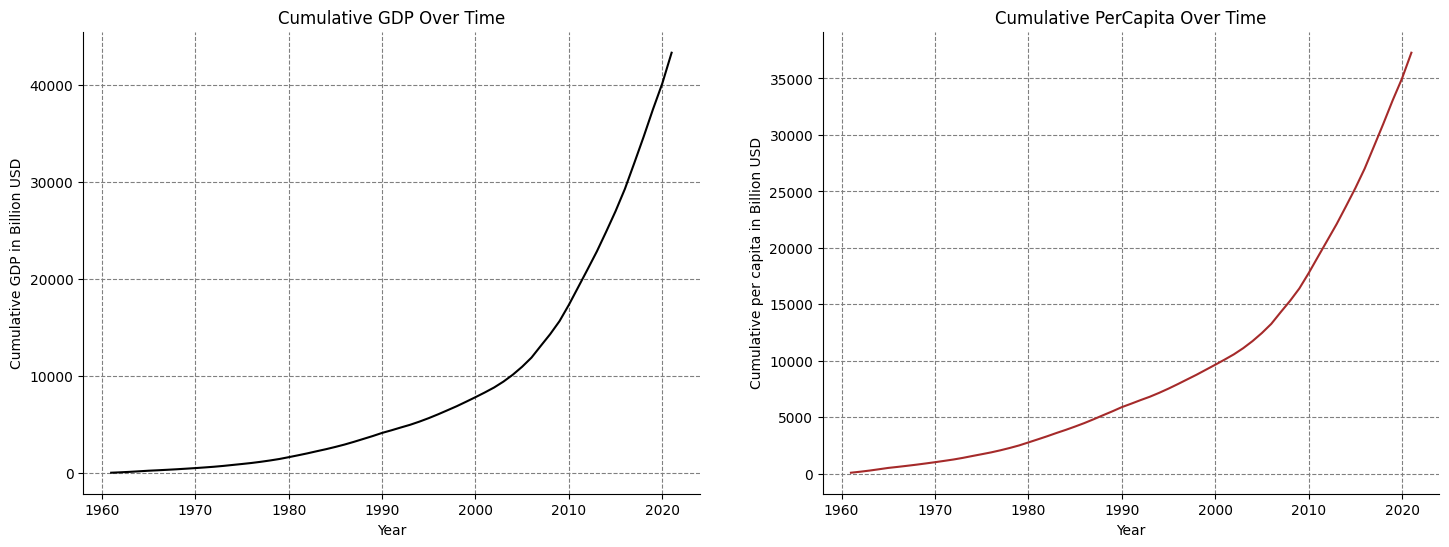

In [12]:
# Create a figure and a set of subplots with 1 row and 2 columns.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17.5,6))

# Plot the cumulative sum of 'GDP_In_Billion_USD' over the years on the first subplot.
ax1.plot(df["Year"],np.cumsum( df["GDP_In_Billion_USD"]), color="black")
# Add a grid to the first subplot.
ax1.grid(linestyle="--", color="grey")
# Set the x-label for the first subplot.
ax1.set_xlabel("Year")
# Set the y-label for the first subplot.
ax1.set_ylabel("Cumulative GDP in Billion USD")
# Set the title for the first subplot.
ax1.set_title("Cumulative GDP Over Time")
# Remove spines from the first subplot.
sns.despine()

# Plot the cumulative sum of 'Per_Capita_in_USD' over the years on the second subplot.
ax2.plot(df["Year"],np.cumsum( df["Per_Capita_in_USD"]), color="brown")
# Add a grid to the second subplot.
ax2.grid(linestyle="--", color="grey")
# Set the x-label for the second subplot.
ax2.set_xlabel("Year")
# Set the y-label for the second subplot.
ax2.set_ylabel("Cumulative per capita in Billion USD")
# Set the title for the second subplot.
ax2.set_title("Cumulative PerCapita Over Time")
# Remove spines from the second subplot.
sns.despine()

/tmp/ipython-input-13-940684766.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x="Year", y ="Percentage_Growth ", palette=color, edgecolor="black")


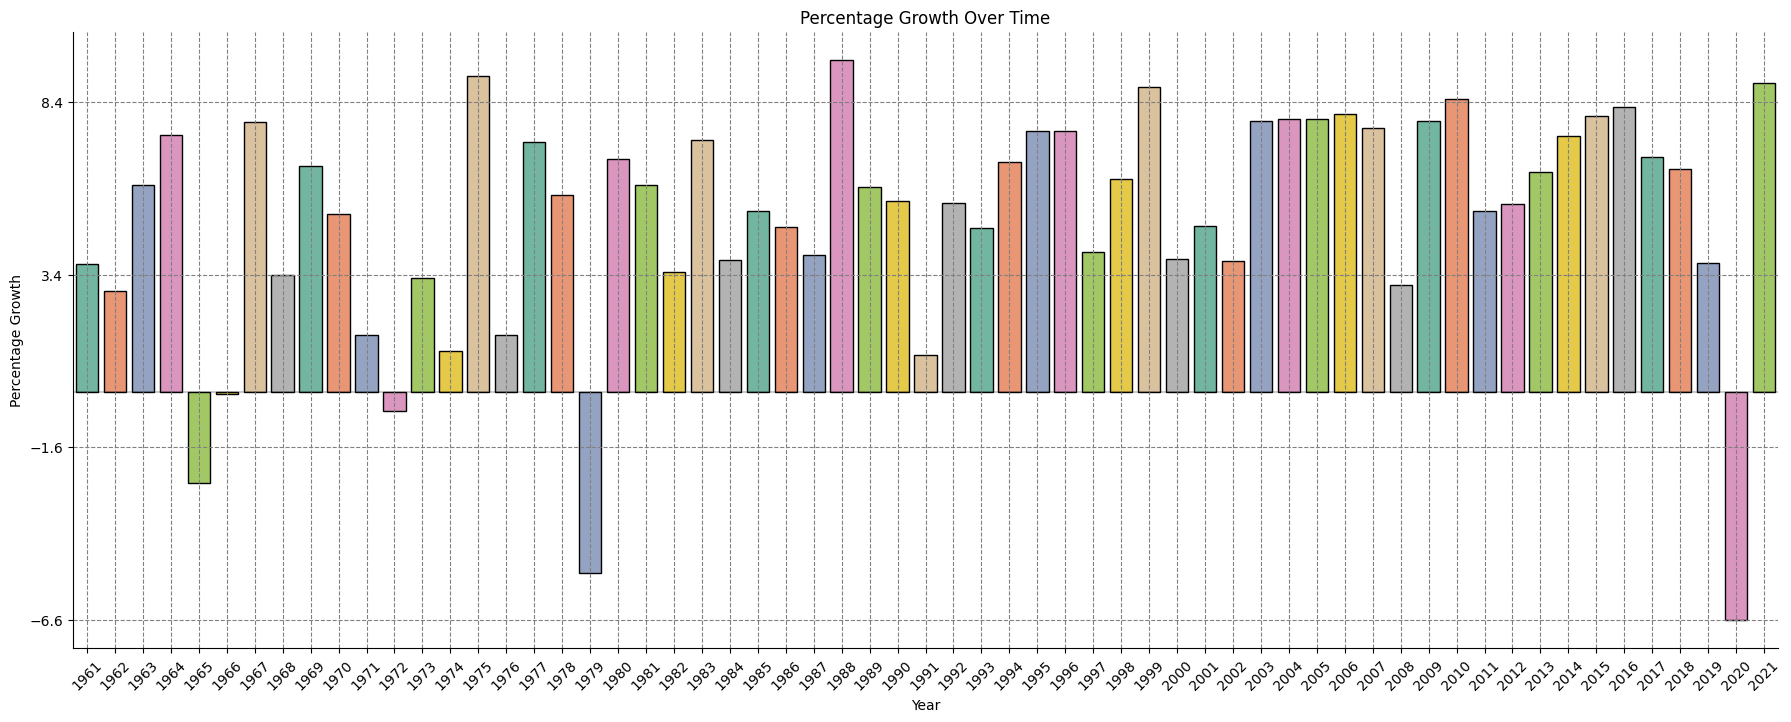

In [13]:
# Set the figure size for the plot.
plt.figure(figsize=(22,8))
# Define a color palette for the bars.
color = sns.color_palette(palette="Set2", n_colors=(len(df))) # Adjusted n_colors to match the number of years

# Create a bar plot of 'Percentage_Growth' over the years.
sns.barplot(data = df, x="Year", y ="Percentage_Growth ", palette=color, edgecolor="black")
# Set the x-axis ticks and labels with rotation for better readability.
plt.xticks(np.arange(0, len(df)), df['Year'], rotation=45)
# Set the y-axis ticks.
plt.yticks(np.arange(df['Percentage_Growth '].min(), df['Percentage_Growth '].max(), 5))

# Set the x-label.
plt.xlabel("Year")
# Set the y-label.
plt.ylabel("Percentage Growth")
# Set the title of the plot.
plt.title("Percentage Growth Over Time")

# Add a horizontal line at y=0 for reference.
plt.axhline(0, color="black", linewidth=0.3)
# Add a grid to the plot.
plt.grid(linestyle="--", color="grey")
# Remove spines from the plot.
sns.despine()
# Display the plot.
plt.show()

/tmp/ipython-input-14-1884679509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, kind="bar", x='Year',y="GDP_In_Billion_USD", height=8, aspect=3,edgecolor="black", palette=color)


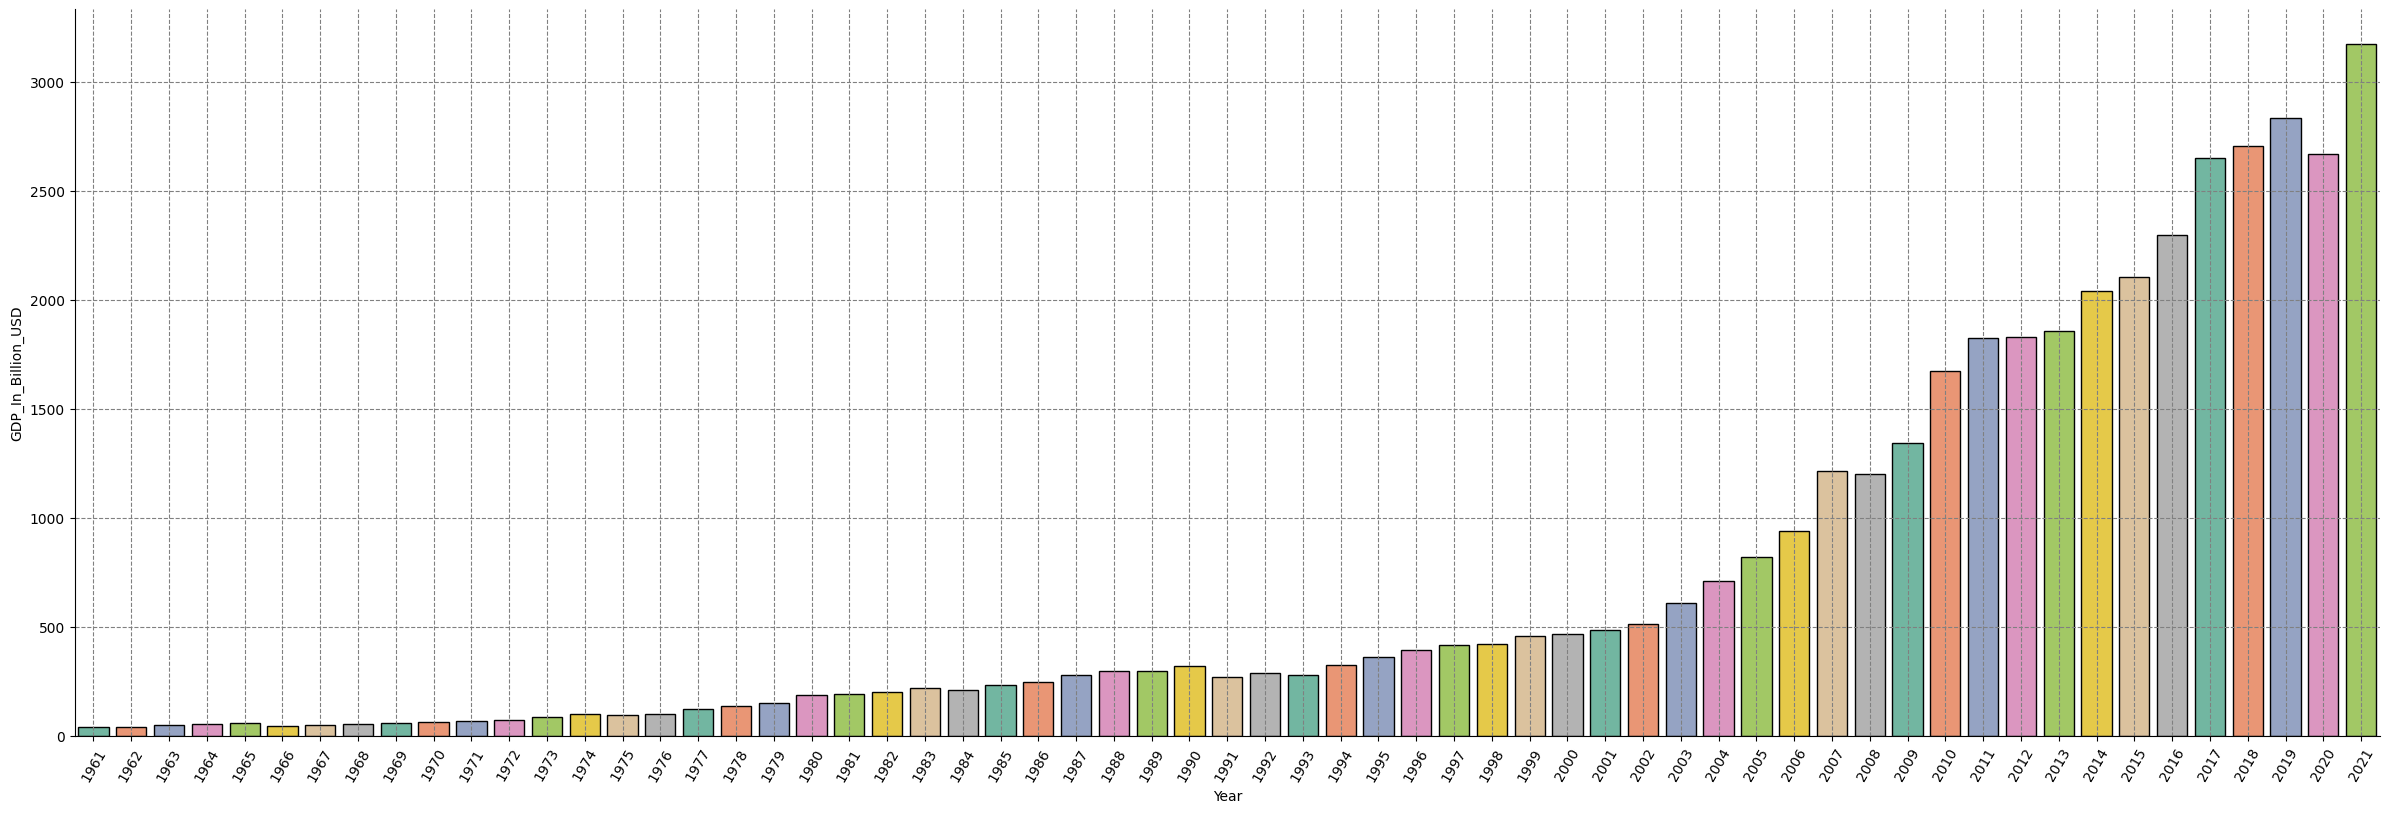

In [14]:
# Define a color palette for the bars.
color = sns.color_palette(palette="Set2", n_colors=(len(df))) # Adjusted n_colors to match the number of years

# Create a categorical bar plot of 'GDP_In_Billion_USD' over the years.
sns.catplot(data=df, kind="bar", x='Year',y="GDP_In_Billion_USD", height=8, aspect=3,edgecolor="black", palette=color)
# Set the x-axis ticks and labels with rotation for better readability.
plt.xticks(np.arange(0, len(df)), df['Year'], rotation=60)

# Add a grid to the plot.
plt.grid(linestyle="--", color="grey")

# Remove spines from the plot.
sns.despine()
# Display the plot.
plt.show()

/tmp/ipython-input-15-364825598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, kind="bar", x='Year',y="Per_Capita_in_USD", height=8, aspect=3,edgecolor="black", palette=color)


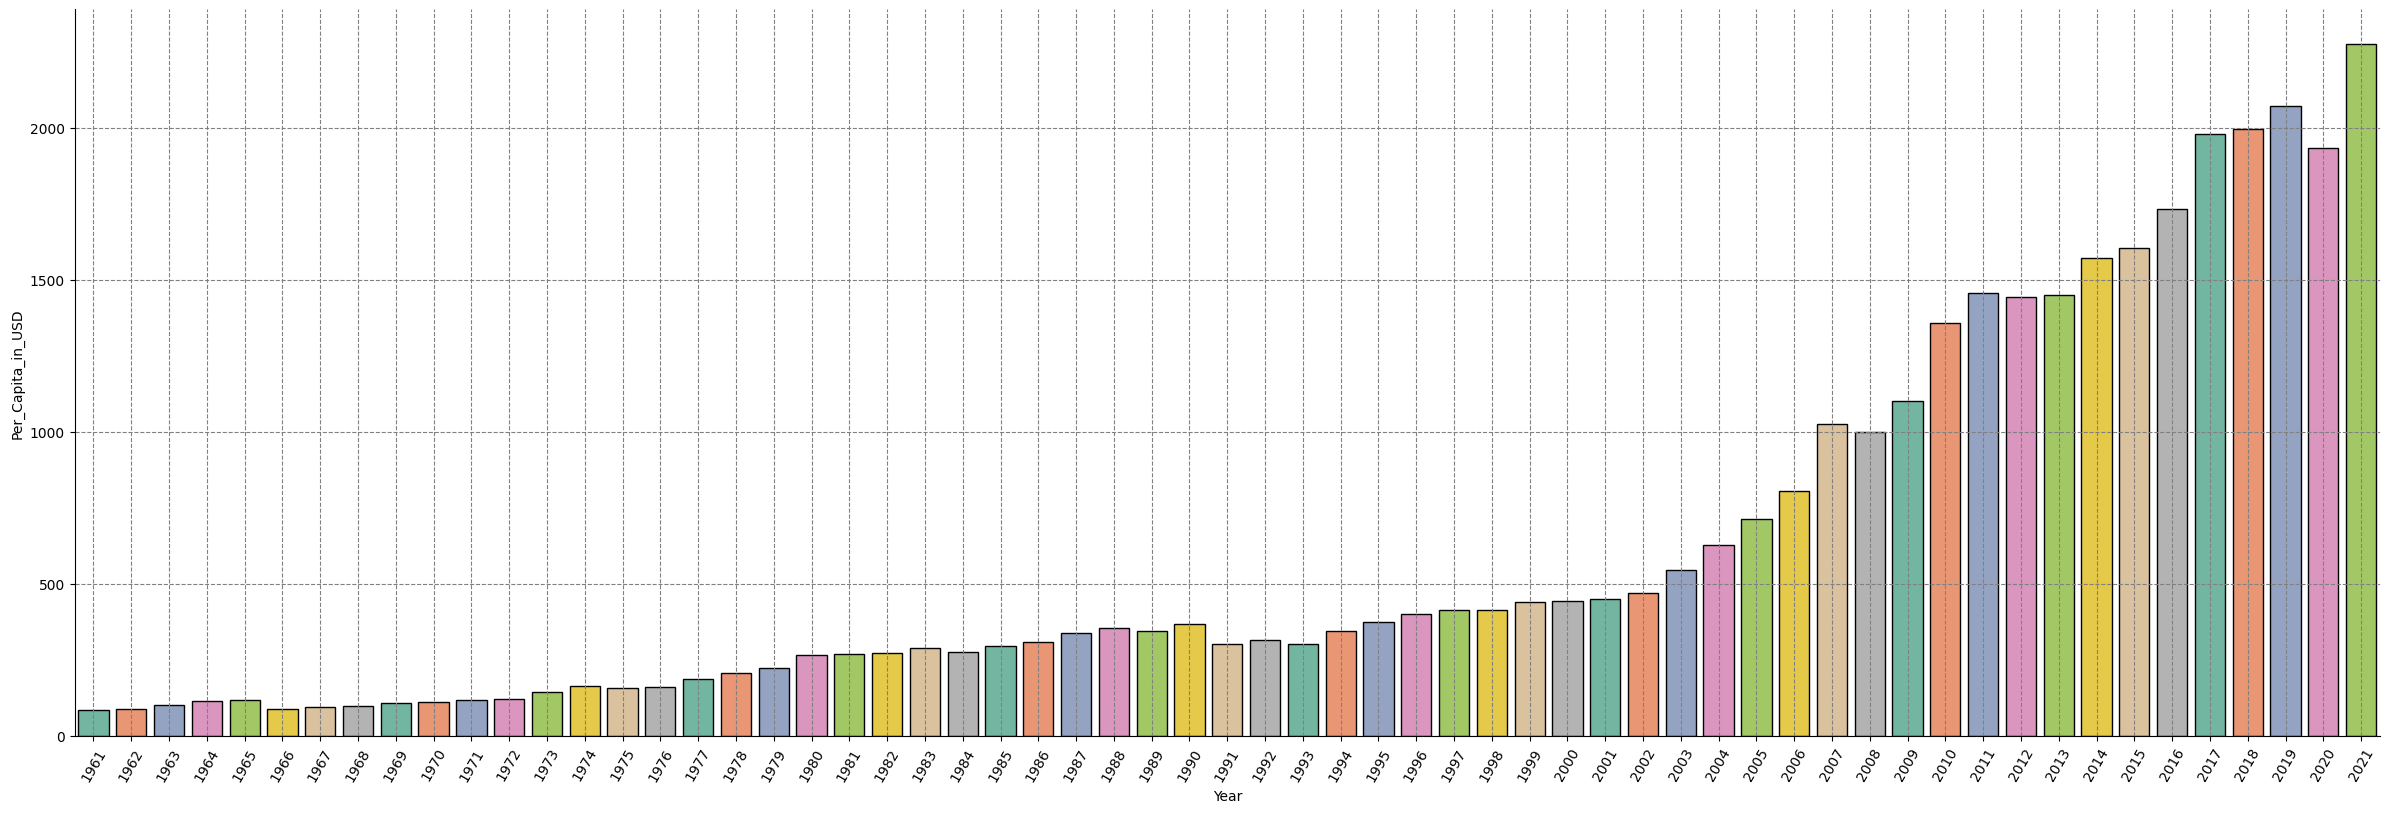

In [15]:
# Define a color palette for the bars.
color = sns.color_palette(palette="Set2", n_colors=(len(df))) # Adjusted n_colors to match the number of years

# Create a categorical bar plot of 'Per_Capita_in_USD' over the years.
sns.catplot(data=df, kind="bar", x='Year',y="Per_Capita_in_USD", height=8, aspect=3,edgecolor="black", palette=color)
# Set the x-axis ticks and labels with rotation for better readability.
plt.xticks(np.arange(0, len(df)), df['Year'], rotation=60)

# Add a grid to the plot.
plt.grid(linestyle="--", color="grey")

# Remove spines from the plot.
sns.despine()
# Display the plot.
plt.show()

In [16]:
df.columns

Index(['Year', 'GDP_In_Billion_USD', 'Per_Capita_in_USD',
       'Percentage_Growth '],
      dtype='object')

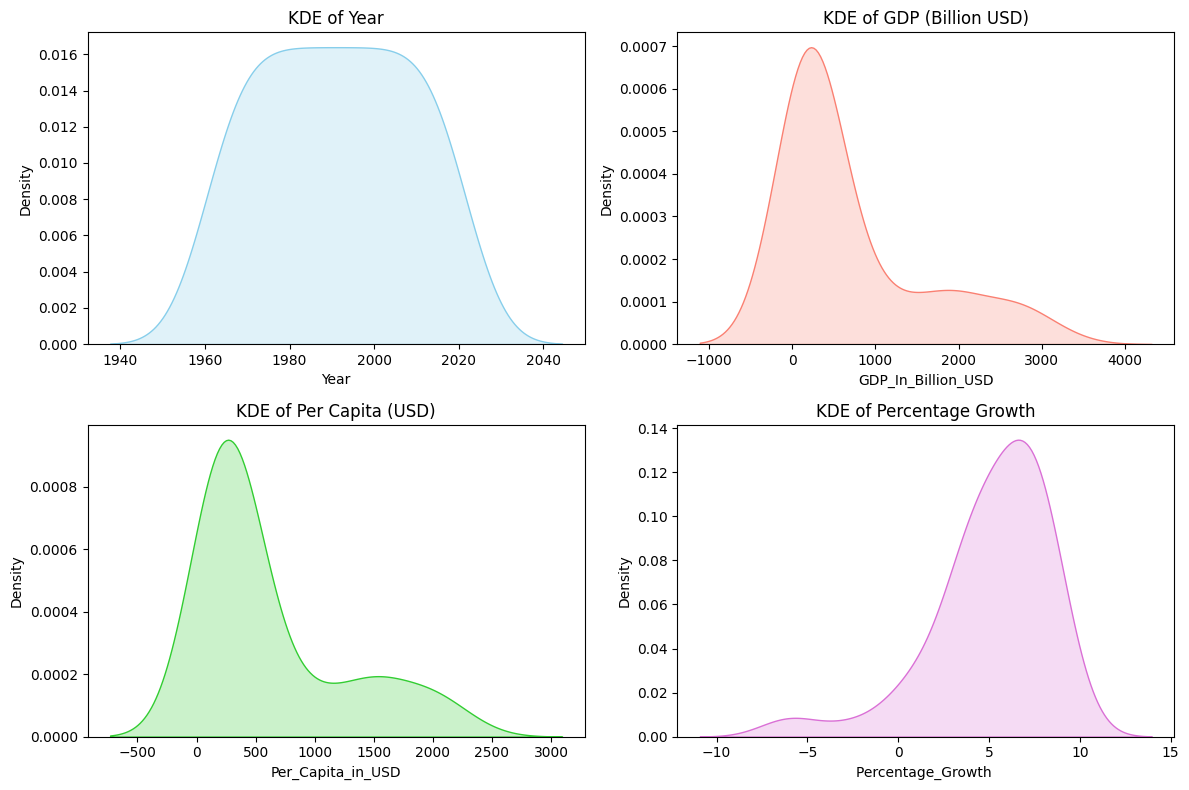

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# KDE for Year
ax1 = axs[0, 0]
sns.kdeplot(df["Year"], ax=ax1 , fill=True, color='skyblue')
ax1.set_title("KDE of Year")

# KDE for GDP
ax2 = axs[0, 1]
sns.kdeplot(df["GDP_In_Billion_USD"], ax=ax2, fill=True, color='salmon')
ax2.set_title("KDE of GDP (Billion USD)")

# KDE for Per Capita
ax3 = axs[1, 0]
sns.kdeplot(df["Per_Capita_in_USD"], ax=ax3, fill=True, color='limegreen')
ax3.set_title("KDE of Per Capita (USD)")

# KDE for Percentage Growth
ax4 = axs[1, 1]
sns.kdeplot(df["Percentage_Growth "], ax=ax4, fill=True, color='orchid')
ax4.set_title("KDE of Percentage Growth")

# Layout adjustment
plt.tight_layout()
plt.show()


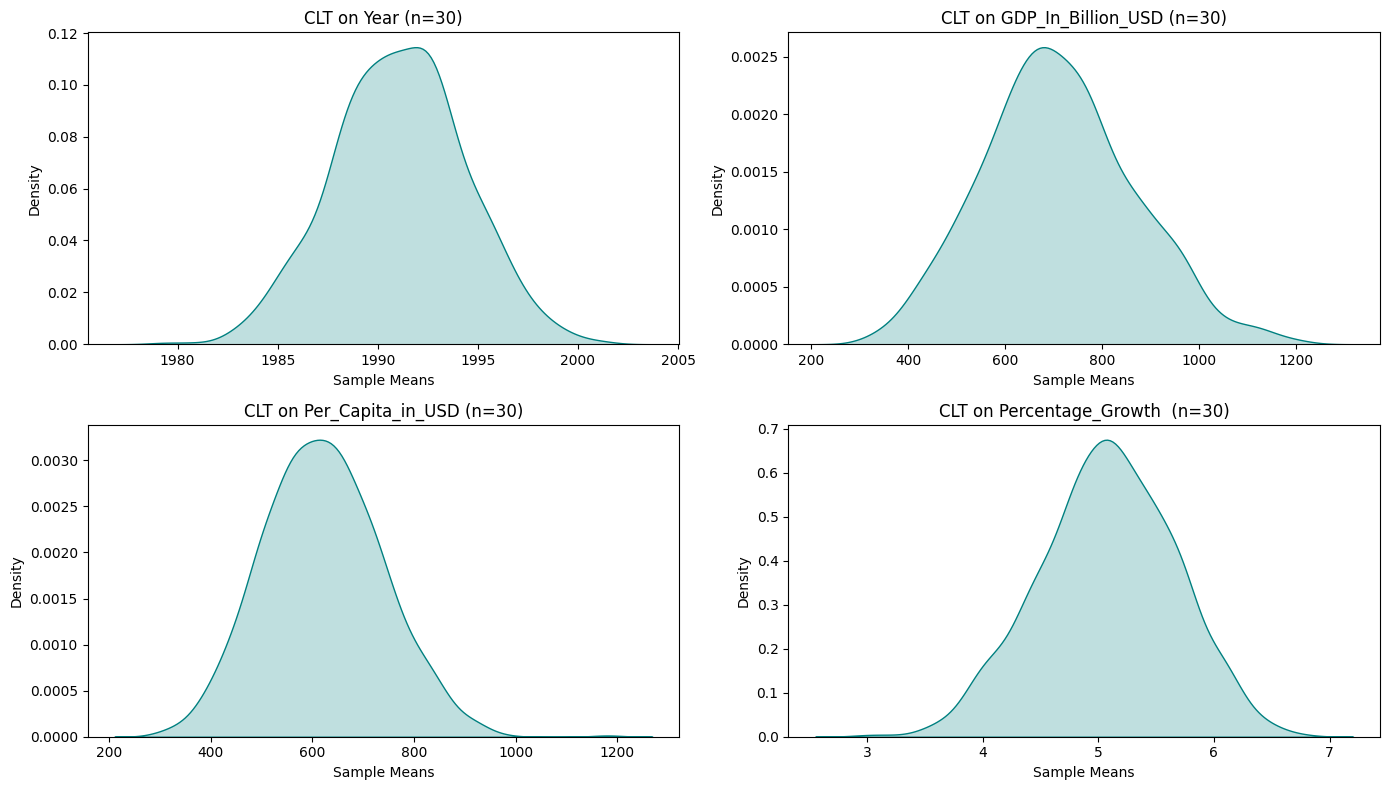

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
sample_size = 30
num_samples = 1000

# Columns to test CLT on
columns = ["Year", "GDP_In_Billion_USD", "Per_Capita_in_USD", "Percentage_Growth "]

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Loop through each column
for i, col in enumerate(columns):
    sample_means = []
    for _ in range(num_samples):
        sample = df[col].sample(sample_size, replace=True)
        sample_means.append(sample.mean())

    row, col_index = divmod(i, 2)
    sns.kdeplot(sample_means, fill=True, ax=axs[row][col_index], color="teal")
    axs[row][col_index].set_title(f"CLT on {col} (n={sample_size})")
    axs[row][col_index].set_xlabel("Sample Means")
    axs[row][col_index].set_ylabel("Density")

plt.tight_layout()
plt.show()


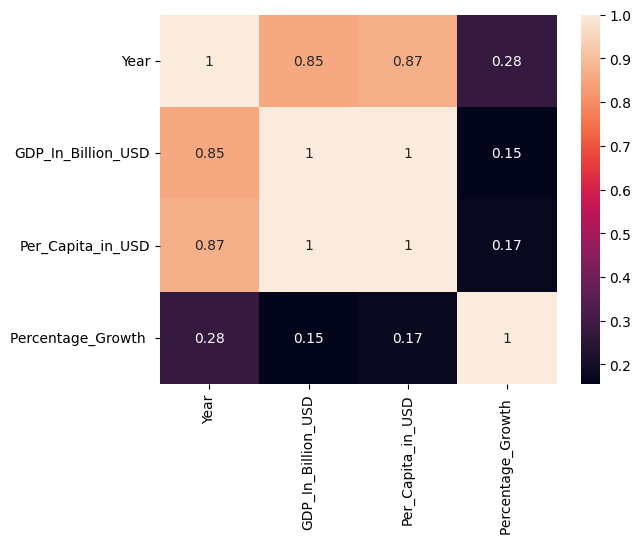

In [19]:
_# Create a heatmap to visualize the correlation matrix of the DataFrame.
sns.heatmap(df.corr(), annot=True)
# Display the plot.
plt.show() # Added plt.show() to display the heatmap